# HEALTH INSURANCE RECOMMENDER SYSTEM

#### ABSTRACT.
Achieving universal health coverage (UHC) is essential for promoting healthy lives and well-being for all. However, one of the biggest obstacles to this goal is healthcare financing. As a result, health insurance has become an increasingly popular approach in developing countries like Kenya to support their UHC efforts. While the primary objective of health insurance is to enhance healthcare access and improve health outcomes, there is limited evidence on its actual effectiveness in improving the health status of the Kenyan population. Therefore, this study seeks to evaluate the impact of health insurance on health outcomes in Kenya.

#### INTRODUCTION
Access to quality healthcare is a global challenge, with millions relying on health insurance to manage medical expenses. However, having the right plan is complex, especially for individuals with pre-existing conditions like asthma, cancer, diabetes, HIV, and hypertension. In Kenya, healthcare coverage is provided through public (NHIF) and private insurers, yet many remain uninsured or underinsured due to high costs, limited coverage, and lack of guidance.

To address this, we propose a Health Insurance Recommender System that uses machine learning to offer personalized policy recommendations based on an individual’s medical history, financial status, and coverage preferences. By simplifying the decision-making process, this system aims to increase insurance adoption, enhance financial protection, and improve healthcare accessibility, particularly for those with chronic conditions.

#### PROBLEM STATEMENT 

Access to affordable and suitable health insurance remains a major challenge in Kenya, particularly for individuals with **pre-existing conditions** such as **asthma, cancer, diabetes, HIV, and hypertension**. Many people struggle to find insurance plans that provide **adequate coverage at a reasonable cost**, leading to **underinsurance or complete lack of coverage**.  

#### Key Challenges:  
- **Complexity of insurance policies**, making it difficult for individuals to understand coverage options.  
- **High costs of private insurance**, which limit accessibility for low- and middle-income individuals.  
- **Limited coverage of public insurance (NHIF)** for chronic illnesses and specialized treatments.  
- **Lack of personalized recommendations**, leading to poor decision-making and enrollment in inadequate plans.  

To address these challenges, there is a need for a **data-driven solution** that simplifies insurance selection by providing **personalized recommendations** based on an individual’s **health status, financial capacity, and coverage needs**.
 A **Health Insurance Recommender System** leveraging **machine learning** can bridge this gap by analyzing **user profiles** and matching individuals with the most **suitable and cost-effective insurance plans**.

#### OBJECTIVES
  

1. Develop a **Health Insurance Recommender System** that provides **personalized insurance recommendations** by analyzing users' **medical history, financial capacity, and coverage needs**.  

2. Implement **demographic-based recommendations, collaborative filtering, and default user profiles** to ensure relevant insurance suggestions, even for users with minimal historical data.  

3. Analyze the impact of **socioeconomic factors** such as **age, gender, income, and location** on **health insurance adoption and affordability**.  

4. Identify gaps in **insurance coverage** by evaluating how individuals with **chronic illnesses** (asthma, diabetes, hypertension, cancer, HIV) are insured across different income levels.  

5. Develop an **affordability-based segmentation model** to recommend cost-effective plans for **low-income individuals** while ensuring adequate coverage for chronic conditions.  

6. Assess the influence of **policy attributes** (e.g., **premium costs, deductibles, and benefits**) on user preferences and decision-making in health insurance selection.  


#### SYNTHETIC DATA LIMITATIONS.
1. **Limited Real-World Complexity**  
   - The dataset may not fully reflect the complexity of real-world health insurance data, missing unexpected trends, outliers, and extreme cases that naturally occur in diverse populations.  

2. **Potential Bias in Data Distribution**  
   - The data generation process may introduce biases, such as **evenly distributed income levels, unrealistic correlations between variables, or oversimplified health conditions**, leading to skewed insights.  

3. **Absence of Real-World Behavioral Patterns**  
   - Unlike real datasets that capture **human decision-making, preferences, and external influences** (e.g., government policies, economic changes), synthetic data lacks genuine behavioral trends.  

4. **No Ground Truth for Validation**  
   - Since the dataset is not based on **actual surveys, insurance records, or real healthcare data**, there is no **authentic benchmark** to validate the accuracy of findings, limiting the reliability of insights.  

5. **Simplified Insurance Plan Attributes**  
   - The dataset may exclude **critical insurance factors** such as **policy exclusions, co-payment requirements, waiting periods, and insurer reputation**, which significantly influence real-world insurance choices.  





### DATA LOADING LOADING AND INSPECTION

##### Loading the dataset

In [53]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

df1 = pd.read_excel("D:\PROJECT\Health-Insurance-Recommender-System\health_insurance_features_definitions.xlsx")
df1.head()

,Feature,Definition
0,user_id,Unique identifier assigned to each user.
1,age,The age of the user in years.
2,gender,"The gender of the user (e.g., Male, Female, Ot..."
3,country,The country where the user resides.
4,region,The specific region within the country.


In [54]:
df1.tail()

,Feature,Definition
37,policy_expiry_date,The expiration date of the current insurance p...
38,duplicate_plan_cost,"Duplicate column of plan_cost, likely due to a..."
39,duplicate_country,"Duplicate column of country, possibly a redund..."
40,waiting_period_months,The number of months the user has to wait befo...
41,claim_reimbursement_speed,The speed at which insurance claims are reimbu...


In [55]:
df2 = pd.read_csv("D:\PROJECT\Health-Insurance-Recommender-System\health_insurance_recommender.csv")
df2.head()

,user_id,age,gender,country,region,employment_status,monthly_income,pre_existing_conditions,number_of_dependents,current_health_expenditure,...,education_level,recent_hospital_visits,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,lifetime_coverage_limit,preferred_hospital,claim_reimbursement_speed
0,1,78.0,Female,Kenya,Urban,Self-Employed,342.147528,Cancer,2,2614.37,...,Bachelor's,5,No,Yes,No,Yes,High,50000,Life Healthcare,Medium
1,2,27.0,Male,Kenya,Semi-Urban,Unemployed,23.271139,NaN,1,3343.49,...,Master's,10,Yes,Yes,No,Yes,High,1000000,Netcare,Slow
2,3,74.0,Male,Kenya,Urban,Unemployed,7605.332784,NaN,5,4615.26,...,Diploma,1,No,Yes,Yes,Yes,High,1000000,Netcare,Fast
3,4,38.0,Male,Kenya,Rural,Employed,2349.243288,Cancer,3,612.38,...,Diploma,5,No,Yes,No,No,High,1000000,Netcare,Medium
4,5,43.0,Male,Kenya,Urban,Employed,17.187938,Asthma,4,2314.12,...,Bachelor's,0,No,Yes,No,Yes,High,1000000,Aga Khan Hospital,Fast


In [56]:
df2.tail()

,user_id,age,gender,country,region,employment_status,monthly_income,pre_existing_conditions,number_of_dependents,current_health_expenditure,...,education_level,recent_hospital_visits,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,lifetime_coverage_limit,preferred_hospital,claim_reimbursement_speed
52495,6270,35.0,Male,Kenya,Semi-Urban,Employed,15.893020,NaN,3,3499.20,...,High School,5,Yes,Yes,Yes,No,Low,50000,Life Healthcare,Slow
52496,2178,41.0,Female,Kenya,Rural,Self-Employed,49.476436,Cancer,3,3036.13,...,Bachelor's,8,Yes,No,Yes,No,High,0,Life Healthcare,Medium
52497,25231,58.0,Other,Kenya,Semi-Urban,Unemployed,2314.782792,HIV,2,4483.59,...,PhD,5,No,Yes,No,Yes,Low,1000000,Mediheal,Slow
52498,8637,50.0,Other,Kenya,Rural,Unemployed,11.434256,Asthma,0,1676.98,...,High School,0,No,Yes,No,No,High,500000,Life Healthcare,Medium
52499,33073,37.0,Other,Kenya,Semi-Urban,Unemployed,10147.409780,HIV,3,855.74,...,PhD,7,No,Yes,Yes,No,High,50000,Mediheal,Medium


In [57]:
df2.shape

(52500, 42)

In [58]:
#Data information.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          49859 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               49864 non-null  float64
 7   pre_existing_conditions      43941 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

In [59]:
#Description
df2.describe()

,user_id,age,monthly_income,number_of_dependents,current_health_expenditure,plan_cost,deductible_amount,out_of_pocket_max,user_satisfaction_rating,duplicate_plan_cost,waiting_period_months,family_size,recent_hospital_visits,lifetime_coverage_limit
count,52500.000000,49859.000000,49864.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,49881.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000
mean,24980.571486,48.535911,2229.294781,2.492286,2542.757659,599.710239,113.864270,381.808335,3.001423,27581.730840,4.911219,3.501067,4.990590,315353.333333
std,14433.032416,17.922048,3993.264625,1.705581,1416.930992,1029.239746,200.843563,634.008554,1.419540,13051.249725,6.010216,1.709279,3.155993,347630.969987
min,1.000000,18.000000,1.281549,0.000000,100.030000,1.260237,0.126121,1.260728,1.000000,5000.160000,0.000000,1.000000,0.000000,0.000000
25%,12479.750000,33.000000,59.004709,1.000000,1316.652500,22.398519,3.185938,21.623265,2.000000,16220.612500,1.000000,2.000000,2.000000,50000.000000
50%,24974.500000,48.000000,611.079480,2.000000,2540.765000,168.510240,31.528224,107.380008,3.000000,27641.475000,3.000000,4.000000,5.000000,100000.000000
75%,37471.250000,64.000000,1360.548180,4.000000,3766.235000,354.352950,69.125184,215.736066,4.000000,38970.142500,6.000000,5.000000,8.000000,500000.000000
max,50000.000000,79.000000,19434.987400,5.000000,4999.990000,4859.763804,971.922240,2915.811432,5.000000,49999.710000,24.000000,6.000000,10.000000,1000000.000000


## Summary of Dataset Description  

**Insights from the descriptive statistics:**  

- **Age Range**: Users are between **18 and 79 years old**, with an average age of **48.5 years**.  
- **Monthly Income**: Varies significantly, with an average of **2,229** and a maximum of **19,434**.  
- **Health Expenditure**: Users spend an average of **2,542** on healthcare, with a max of **4,999**.  
- **Plan Cost & Deductibles**: The average **plan cost** is **599**, while deductibles range from **0.12 to 971**.  
- **User Satisfaction Rating**: Ranges from **1 to 5**, with a median of **3**, indicating **moderate satisfaction**.  
- **Family & Dependents**: Most users have **2-5 dependents**, with a max **family size of 6**.  
- **Lifetime Coverage Limit**: Ranges widely, from **0 to 1,000,000**, with a median of **100,000**.  






<h2 style="color: blue;">EXPLANATORY DATA ANALYSIS</h2>


##### Check for missing values

In [60]:
# Select columns with missing values
missing_values = df2.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

age                         2641
monthly_income              2636
pre_existing_conditions     8559
user_satisfaction_rating    2619
dtype: int64


In [61]:
#Checking the percentages of the missing vlaues in these columns.
# Select the columns with missing values
missing_columns = ['age', 'monthly_income', 'user_satisfaction_rating']

# Calculate the percentage of missing values
missing_percentage = (df2[missing_columns].isnull().sum() / len(df2)) * 100

# Display the results
print(missing_percentage)

age                         5.030476
monthly_income              5.020952
user_satisfaction_rating    4.988571
dtype: float64


**Handling the missing values on the three columns**

**Visual Representation of the columns with the missing values**.

This is to check the distribution so at to use the bset method on handling the missing values.

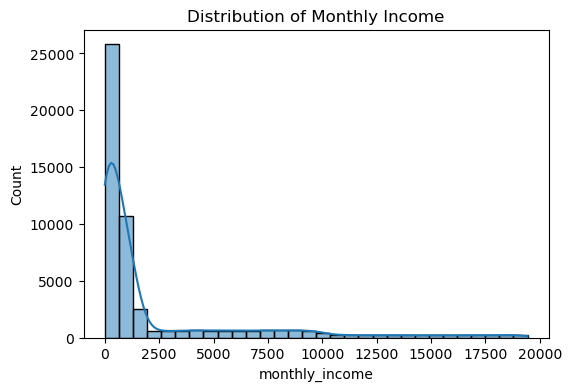

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for numerical features
plt.figure(figsize=(6, 4))
sns.histplot(df2['monthly_income'], bins=30, kde=True)  # kde=True adds a smooth density curve
plt.title('Distribution of Monthly Income')
plt.show()


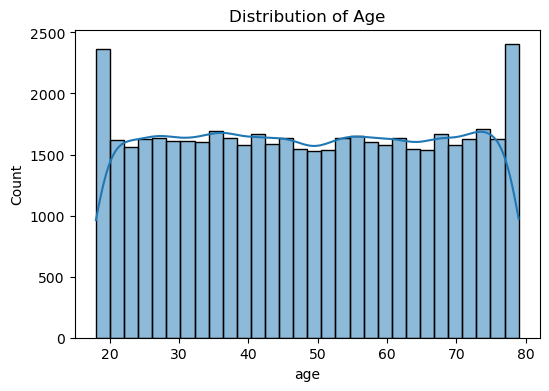

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for numerical features
plt.figure(figsize=(6, 4))
sns.histplot(df2['age'], bins=30, kde=True)  # kde=True adds a smooth density curve
plt.title('Distribution of Age')
plt.show()

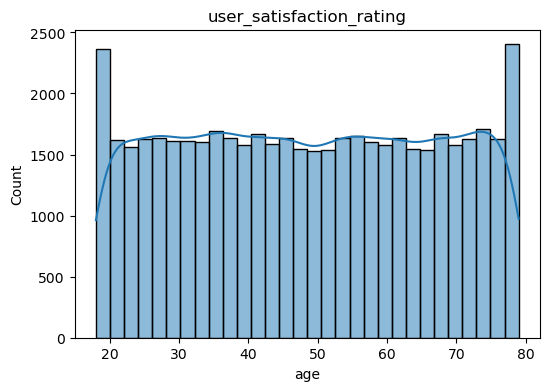

In [64]:
# Plot histogram for numerical features
plt.figure(figsize=(6,4))
sns.histplot(df2['age'], bins=30, kde=True)  
plt.title('user_satisfaction_rating')
plt.show()

## Summary

- **Monthly Income:**
It is highly skewed to the right (positively skewed), meaning there are many low-income values and a few extremely high-income values.
Mean is not the best choice because it is affected by the outliers (high values).

**median** to handle missing values due to right-skewness.  
- **Age:** **median**   
The age histogram appears uniformly distributed with some peaks at the boundaries.
Since it is not strongly skewed, mean or median can be used for imputation.
However, if there are clear clusters or outliers, median is the safer option.

- **User Satisfaction Rating:**  
  -**mode**.  
   


In [65]:
import pandas as pd

def fill_missing_values(df):
    """Converts 'age' to numeric, then fills missing values using median, mean, and mode."""
    
    # Convert 'age' from object to numeric (handling errors)
    df['age'] = pd.to_numeric(df['age'], errors='coerce')

    # Fill 'age' with the median
    df['age'].fillna(df['age'].median(), inplace=True)

    # Fill 'monthly_income' with the mean
    df['monthly_income'].fillna(df['monthly_income'].mean(), inplace=True)

    # Fill 'user_satisfaction_rating' with the mode
    df['user_satisfaction_rating'].fillna(df['user_satisfaction_rating'].mode()[0], inplace=True)

# Apply the function to df2
fill_missing_values(df2)


## Categoricl and Numerical Columns

In [66]:
# Separate categorical and numerical columns
categorical_cols = df2.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['gender',
 'country',
 'region',
 'employment_status',
 'pre_existing_conditions',
 'hospital_preference',
 'previous_insurance_coverage',
 'preferred_coverage_type',
 'insurance_provider',
 'medication_coverage',
 'maternity_coverage',
 'chronic_illness_coverage',
 'emergency_coverage',
 'dental_coverage',
 'vision_coverage',
 'recommended_plan',
 'policy_expiry_date',
 'duplicate_country',
 'marital_status',
 'employment_type',
 'education_level',
 'smoking_habit',
 'alcohol_consumption',
 'existing_medications',
 'disability_status',
 'co_payment_preference',
 'preferred_hospital',
 'claim_reimbursement_speed']

In [67]:
len(categorical_cols)

28

In [68]:
#Numerical columns
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols


['user_id',
 'age',
 'monthly_income',
 'number_of_dependents',
 'current_health_expenditure',
 'plan_cost',
 'deductible_amount',
 'out_of_pocket_max',
 'user_satisfaction_rating',
 'duplicate_plan_cost',
 'waiting_period_months',
 'family_size',
 'recent_hospital_visits',
 'lifetime_coverage_limit']

In [69]:
len(numerical_cols)

14

In [70]:
#checking for duplicates
duplicates_rows = df2[df2.duplicated()]

#print thhe number of duplicated rows
print(f"Number of duplicate rows: {duplicates_rows.shape[0]}")

Number of duplicate rows: 0


## Visualizations
## Univariate Analysis
#### 1.Demographic Category.


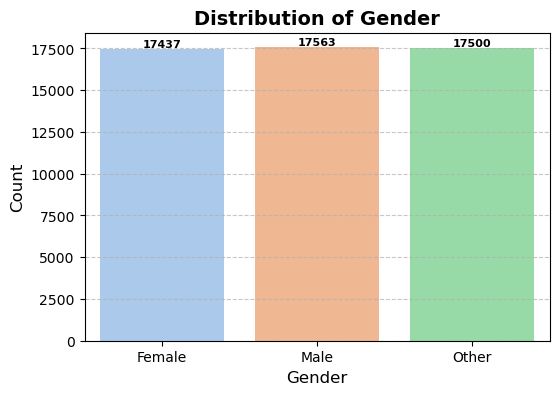

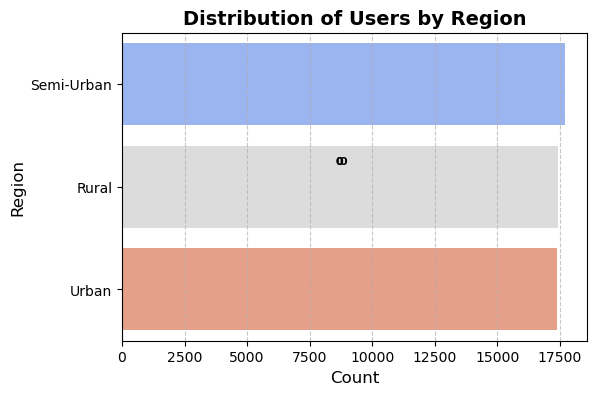

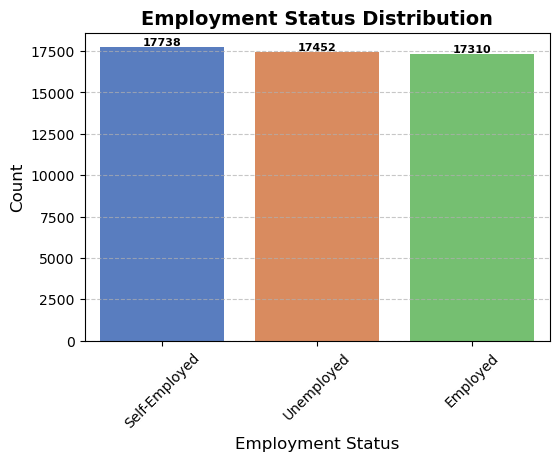

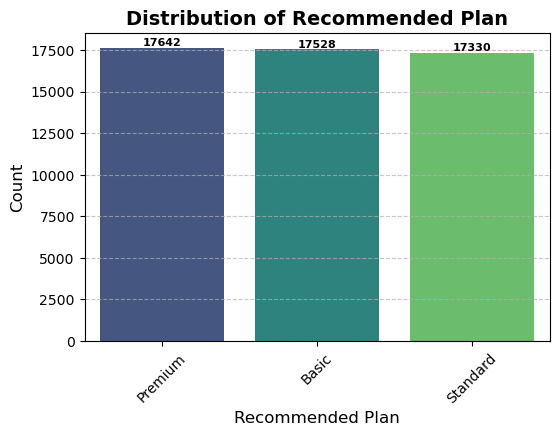

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to add value labels on bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')

# 1 Gender Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='gender', data=df2, palette='pastel')
add_value_labels(ax)
plt.title('Distribution of Gender', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2Region Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(y='region', data=df2, palette='coolwarm', order=df2['region'].value_counts().index)
add_value_labels(ax)
plt.title('Distribution of Users by Region', fontsize=14, weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3 Employment Status Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='employment_status', data=df2, palette='muted', order=df2['employment_status'].value_counts().index)
add_value_labels(ax)
plt.title('Employment Status Distribution', fontsize=14, weight='bold')
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Recommended Plan Distribution (Target Variable)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='recommended_plan', data=df2, palette='viridis', order=df2['recommended_plan'].value_counts().index)
add_value_labels(ax)
plt.title('Distribution of Recommended Plan', fontsize=14, weight='bold')
plt.xlabel('Recommended Plan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Majority of the users have the premium insurance plan and also the larger group are self employed.

#### 2. Insurance-Related Preference

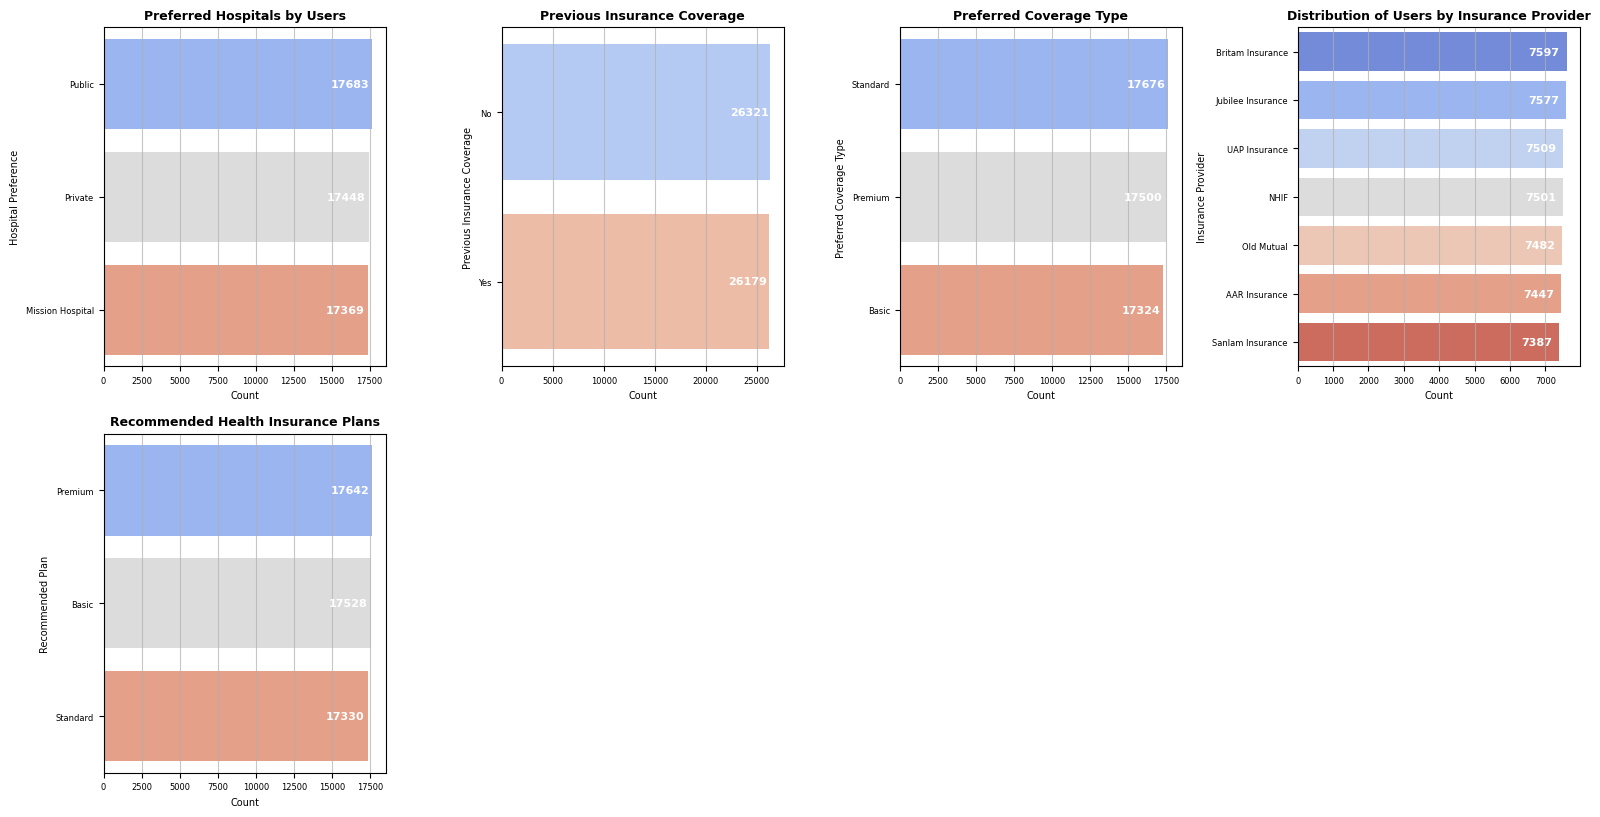

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

def add_value_labels(ax):
    """Add value labels inside bars for a cleaner look."""
    for p in ax.patches:
        if p.get_width() > 0:  # Avoid errors for zero-width bars
            ax.annotate(f'{int(p.get_width())}',  
                        (p.get_width() - 200, p.get_y() + p.get_height() / 2),  # Shift text leftwards
                        ha='right', va='center', fontsize=8, fontweight='bold', color='white')  # White for contrast

def visualize_insurance_preferences(df2):
    """Visualize insurance-related preferences using count plots in a 3x4 grid."""
    preferences = {
        'hospital_preference': 'Preferred Hospitals by Users',
        'previous_insurance_coverage': 'Previous Insurance Coverage',
        'preferred_coverage_type': 'Preferred Coverage Type',
        'insurance_provider': 'Distribution of Users by Insurance Provider',
        'recommended_plan': 'Recommended Health Insurance Plans'
    }

    # Create a 3x4 grid for plots
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))  # Adjust size as needed
    axes = axes.flatten()  # Flatten the 3x4 array for easy iteration

    for i, (col, title) in enumerate(preferences.items()):
        ax = axes[i]  # Assign each plot to a subplot
        sns.countplot(y=col, data=df2, palette='coolwarm', order=df2[col].value_counts().index, ax=ax)
        add_value_labels(ax)

        ax.set_xlabel('Count', fontsize=7)
        ax.set_ylabel(col.replace("_"," ").title(), fontsize=7)
        ax.set_title(title, fontsize=9, fontweight='bold')
        ax.grid(axis='x', linestyle='-', alpha=0.7)
        ax.tick_params(axis='both', labelsize=6)  # Reduce font size

    # Hide any unused subplots (if fewer than 12 plots exist)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Calling the function
visualize_insurance_preferences(df2)


**Key Takeaways**

-Users exhibit diverse preferences across hospital types, insurance providers, and coverage types.

-A significant portion of the population is new to health insurance.

-Insurance providers have a competitive distribution, with no overwhelming market leader.

-Recommended plans are evenly distributed.

## Bivariate analysis

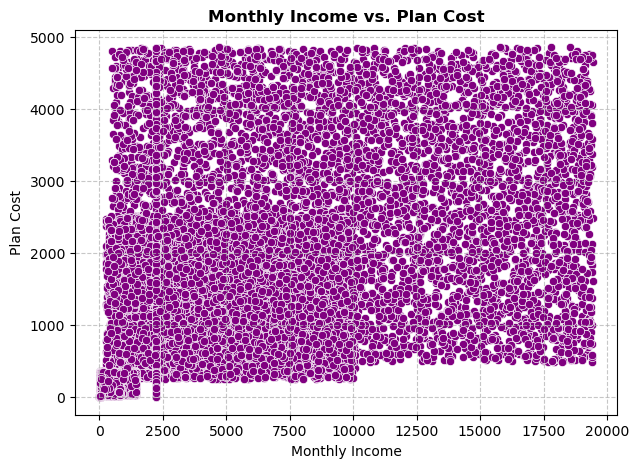

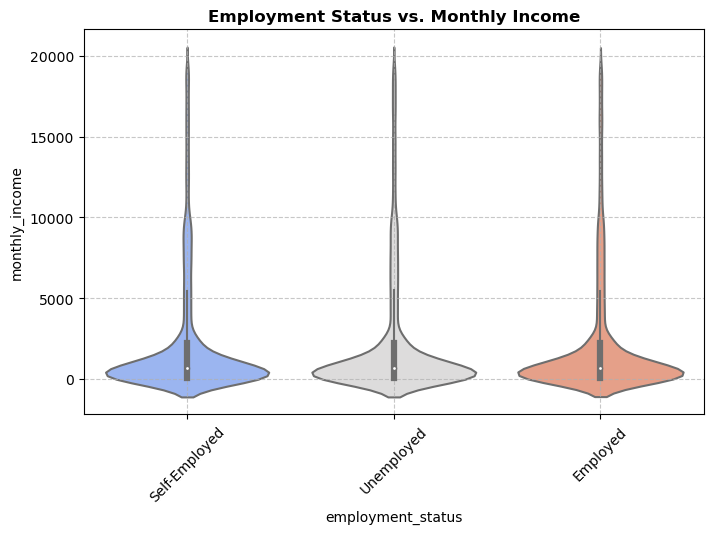

In [75]:
# 🔹 Scatter Plot: Monthly Income vs. Plan Cost
plt.figure(figsize=(7, 5))
sns.scatterplot(x='monthly_income', y='plan_cost', data=df2, color='purple')
plt.title("Monthly Income vs. Plan Cost", fontsize=12, fontweight='bold')
plt.xlabel("Monthly Income")
plt.ylabel("Plan Cost")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 🔹 Violin Plot: Employment Status vs. Monthly Income
plt.figure(figsize=(8, 5))
sns.violinplot(x='employment_status', y='monthly_income', data=df2, palette='coolwarm')
plt.title("Employment Status vs. Monthly Income", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




The scatter plot shows no strong correlation between income and plan cost, indicating other factors may influence plan selection. The violin plot reveals that most individuals, regardless of employment status, have low incomes, with some high-income outliers, suggesting wide income variation within each group.

## Multivariate Analysis


In [76]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

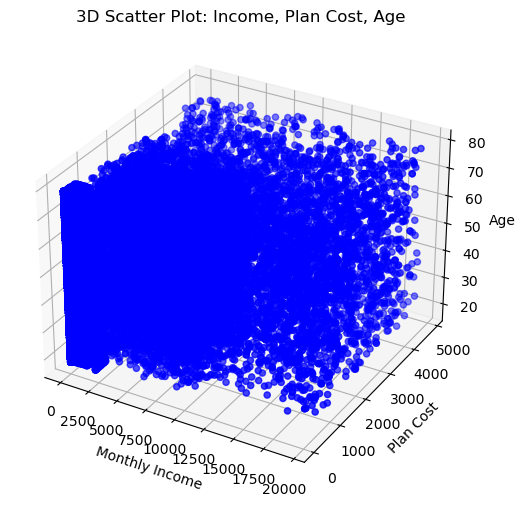

In [78]:
# 🔹 3D Scatter Plot: Income, Plan Cost, and Age
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['monthly_income'], df2['plan_cost'], df2['age'], c='blue', marker='o')
ax.set_xlabel('Monthly Income')
ax.set_ylabel('Plan Cost')
ax.set_zlabel('Age')
ax.set_title("3D Scatter Plot: Income, Plan Cost, Age")
plt.show()

**Observations**

-There is a dense vertical cluster on the left side, indicating many individuals with lower incomes.

-The data points span across a wide range of ages, suggesting a diverse demographic.

-Plan costs appear distributed, but the relationship between income and plan cost is less clear due to the overlapping points.

###  Outliers visualization

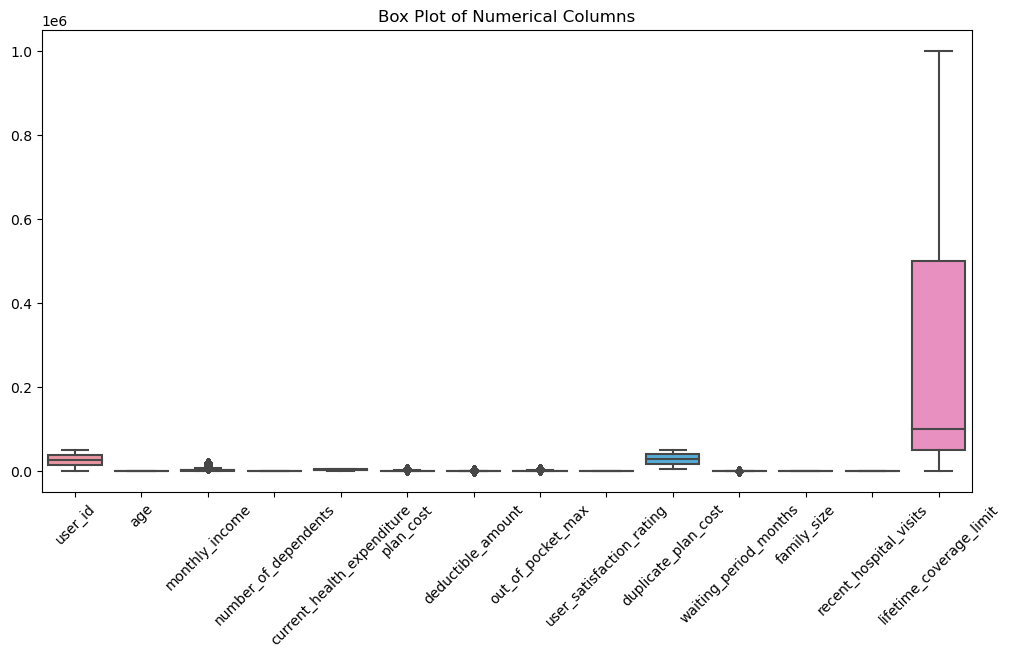

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns dynamically
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a box plot for each numerical column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2[numerical_cols])

# Add a title and adjust labels
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()



The box plot suggests that some columns have extreme outliers, especially lifetime_coverage_limit and possibly monthly_income or recent_hospital_visits.
 We will remove the columns  'lifetime coverage limit since it has most outliers.

# PREPROCESSING.

Identifying columns to drop in both numerical and categorical columns.

1. Numerical
 Unique identifiers (e.g., user_id if present).

Highly correlated columns (correlation > 0.9).

Columns with too many missing values (e.g., > 50% missing).

Low variance columns (near-constant values).

2. Categorical 

High cardinality columns (columns with too many unique values).

Columns with a single unique value (constant).

Duplicated or redundant columns (duplicate_country might be the same as country).


In [80]:
#Numerical columns to drop
# Checking missing values
missing_values = df2[numerical_cols].isnull().sum()
missing_cols = missing_values[missing_values > (0.5 * len(df2))].index.tolist()

# Checking high correlation
corr_matrix = df2[numerical_cols].corr().abs()
high_corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [col for col in high_corr_pairs.columns if any(high_corr_pairs[col] > 0.9)]

# Checking low variance
low_variance_cols = df2[numerical_cols].var()[df2[numerical_cols].var() < 1e-5].index.tolist()

# Final list of numerical columns to drop
numerical_drop_cols = list(set(missing_cols + high_corr_cols + low_variance_cols))
print("Numerical columns to drop:", numerical_drop_cols)

Numerical columns to drop: []


In [81]:
#Categorical columns to drop


In [82]:
# Checking high cardinality
high_cardinality_cols = [col for col in categorical_cols if df2[col].nunique() > 50]  # Adjust threshold as needed

# Checking single unique value columns
single_value_cols = [col for col in categorical_cols if df2[col].nunique() == 1]

# Checking duplicated columns
redundant_cols = ['duplicate_country']  # If confirmed duplicate

# Final list of categorical columns to drop
categorical_drop_cols = list(set(high_cardinality_cols + single_value_cols + redundant_cols))
print("Categorical columns to drop:", categorical_drop_cols)


Categorical columns to drop: ['country', 'policy_expiry_date', 'duplicate_country']


In [83]:
df2.drop(columns=['policy_expiry_date', 'duplicate_country', 'country'], inplace=True)
print("Final shape after dropping categorical columns:", df2.shape)


Final shape after dropping categorical columns: (52500, 39)


In [84]:
#Additional columns to drop

In [85]:
drop_cols = ['waiting_period_months', 'family_size', 'recent_hospital_visits', 
             'lifetime_coverage_limit', 'duplicate_plan_cost']

df2.drop(columns=drop_cols, inplace=True)

print("Final shape after dropping numerical columns:", df2.shape)


Final shape after dropping numerical columns: (52500, 34)


In [86]:
#Recalling the dataset
df2.head()

,user_id,age,gender,region,employment_status,monthly_income,pre_existing_conditions,number_of_dependents,current_health_expenditure,hospital_preference,...,marital_status,employment_type,education_level,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,preferred_hospital,claim_reimbursement_speed
0,1,78.0,Female,Urban,Self-Employed,342.147528,Cancer,2,2614.37,Private,...,Single,Unemployed,Bachelor's,No,Yes,No,Yes,High,Life Healthcare,Medium
1,2,27.0,Male,Semi-Urban,Unemployed,23.271139,NaN,1,3343.49,Public,...,Divorced,Salaried,Master's,Yes,Yes,No,Yes,High,Netcare,Slow
2,3,74.0,Male,Urban,Unemployed,7605.332784,NaN,5,4615.26,Mission Hospital,...,Divorced,Self-employed,Diploma,No,Yes,Yes,Yes,High,Netcare,Fast
3,4,38.0,Male,Rural,Employed,2349.243288,Cancer,3,612.38,Public,...,Married,Self-employed,Diploma,No,Yes,No,No,High,Netcare,Medium
4,5,43.0,Male,Urban,Employed,17.187938,Asthma,4,2314.12,Private,...,Married,Unemployed,Bachelor's,No,Yes,No,Yes,High,Aga Khan Hospital,Fast


In [87]:
#extract categorical columns
categorical_cols = df2.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:", categorical_cols)


Categorical Columns: ['gender', 'region', 'employment_status', 'pre_existing_conditions', 'hospital_preference', 'previous_insurance_coverage', 'preferred_coverage_type', 'insurance_provider', 'medication_coverage', 'maternity_coverage', 'chronic_illness_coverage', 'emergency_coverage', 'dental_coverage', 'vision_coverage', 'recommended_plan', 'marital_status', 'employment_type', 'education_level', 'smoking_habit', 'alcohol_consumption', 'existing_medications', 'disability_status', 'co_payment_preference', 'preferred_hospital', 'claim_reimbursement_speed']


In [88]:
len(categorical_cols)

25

In [89]:
# xtract numerical columns
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical Columns:", numerical_cols)


Numerical Columns: ['user_id', 'age', 'monthly_income', 'number_of_dependents', 'current_health_expenditure', 'plan_cost', 'deductible_amount', 'out_of_pocket_max', 'user_satisfaction_rating']


In [92]:
len(numerical_cols)

9

**1.One Hot Ecoding and Ordinal encoding**

We will use one hot encoding and ordinal encoding since some of the categorical columns on the datest are arranged hierachal order.

In [93]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import pandas as pd

# Ensure categorical columns are identified correctly
categorical_cols = df2.select_dtypes(include=['object']).columns.tolist()

# 1️⃣ **Ordinal Encoding** (For Ordered Categories)
ordinal_features = {
    'recommended_plan': ['Basic', 'Standard', 'Premium'],
    'education_level': ['High School', "Bachelor's", "Master's", 'PhD', 'Diploma'],
    'co_payment_preference': ['Low', 'Medium', 'High']
}

ordinal_encoder = OrdinalEncoder(categories=[ordinal_features[col] for col in ordinal_features])
df2[list(ordinal_features.keys())] = ordinal_encoder.fit_transform(df2[list(ordinal_features.keys())]).astype(int)

# 2️⃣ **Label Encoding** (For Binary Categories)
label_encoder = LabelEncoder()
binary_features = ['gender', 'disability_status']
for col in binary_features:
    df2[col] = label_encoder.fit_transform(df2[col])

# 3️⃣ **One-Hot Encoding** (For Nominal Categories)
nominal_features = list(set(categorical_cols) - set(ordinal_features.keys()) - set(binary_features))
df2 = pd.get_dummies(df2, columns=nominal_features, drop_first=True)

# **Check Updated Dataset**
print("Encoded dataset shape:", df2.shape)
df2.head()


Encoded dataset shape: (52500, 53)


,user_id,age,gender,monthly_income,number_of_dependents,current_health_expenditure,plan_cost,deductible_amount,out_of_pocket_max,user_satisfaction_rating,...,claim_reimbursement_speed_Slow,vision_coverage_Yes,pre_existing_conditions_Cancer,pre_existing_conditions_Diabetes,pre_existing_conditions_HIV,pre_existing_conditions_Hypertension,region_Semi-Urban,region_Urban,existing_medications_Yes,emergency_coverage_Yes
0,1,78.0,0,342.147528,2,2614.37,282.640320,28.759968,104.129064,1.0,...,0,0,1,0,0,0,0,1,0,1
1,2,27.0,1,23.271139,1,3343.49,1.968957,0.813804,1.718194,1.0,...,1,0,0,0,0,0,1,0,0,1
2,3,74.0,1,7605.332784,5,4615.26,1491.425208,417.132072,804.036744,4.0,...,0,0,0,0,0,0,0,1,1,1
3,4,38.0,1,2349.243288,3,612.38,1334.738664,290.673432,535.564512,2.0,...,0,1,1,0,0,0,0,0,0,0
4,5,43.0,1,17.187938,4,2314.12,5.158692,1.276281,3.653894,4.0,...,0,1,0,0,0,0,0,1,0,1


**The entire dataset is now fully encoded**

**2.Feature Scalling**

The dataset contains variables like monthly_income, plan_cost, and deductible_amount, which are likely right-skewed,we will use minmax scaller

In [95]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: numerical columns
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude the target variable (recommended_plan) if needed
numerical_cols.remove('recommended_plan')  # Only if it's part of numerical_cols

# Step 2: Initialize MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Fit and transform numerical features
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

# Step 4: Check scaled dataset
print("Scaled dataset shape:", df2.shape)
df2.head()


Scaled dataset shape: (52500, 53)


,user_id,age,gender,monthly_income,number_of_dependents,current_health_expenditure,plan_cost,deductible_amount,out_of_pocket_max,user_satisfaction_rating,...,claim_reimbursement_speed_Slow,vision_coverage_Yes,pre_existing_conditions_Cancer,pre_existing_conditions_Diabetes,pre_existing_conditions_HIV,pre_existing_conditions_Hypertension,region_Semi-Urban,region_Urban,existing_medications_Yes,emergency_coverage_Yes
0,0.00000,0.983607,0,0.017540,0.4,0.513135,0.057915,0.029465,0.035295,0.00,...,0,0,1,0,0,0,0,1,0,1
1,0.00002,0.147541,1,0.001132,0.2,0.661936,0.000146,0.000708,0.000157,0.00,...,1,0,0,0,0,0,1,0,0,1
2,0.00004,0.918033,1,0.391282,1.0,0.921483,0.306713,0.429108,0.275437,0.75,...,0,0,0,0,0,0,0,1,1,1
3,0.00006,0.327869,1,0.120819,0.6,0.104562,0.274463,0.298980,0.183323,0.25,...,0,1,1,0,0,0,0,0,0,0
4,0.00008,0.409836,1,0.000818,0.8,0.451859,0.000802,0.001184,0.000821,0.75,...,0,1,0,0,0,0,0,1,0,1


**3.Feature Selection**

-Reduces dimensionality → Removes irrelevant features and improves model efficiency.

-Improves accuracy → Focuses on the most relevant data.

-Prevents overfitting → Reduces noise and unnecessary complexity.

a)Correlation-Based Feature Selection (Numerical Features)*

Check which features have the highest correlation with our target variable (recommended_plan).

In [96]:
# Compute correlation matrix
correlation_matrix = df2.corr()

# Select top 10 features most correlated with the target variable ('recommended_plan')
top_10_features = correlation_matrix['recommended_plan'].abs().sort_values(ascending=False)[1:11]

# Display selected features
print("Top 10 Features Most Correlated with Recommended Plan:\n", top_10_features)

Top 10 Features Most Correlated with Recommended Plan:
 insurance_provider_Jubilee Insurance    0.009043
preferred_coverage_type_Standard        0.008095
out_of_pocket_max                       0.007794
current_health_expenditure              0.006172
smoking_habit_Yes                       0.005550
employment_type_Self-employed           0.005284
co_payment_preference                   0.005267
preferred_hospital_Nairobi Hospital     0.005172
previous_insurance_coverage_Yes         0.005034
employment_type_Unemployed              0.004957
Name: recommended_plan, dtype: float64


Top 10 Most Important Features:
 current_health_expenditure    0.068825
user_id                       0.067711
deductible_amount             0.066253
out_of_pocket_max             0.066231
plan_cost                     0.066090
monthly_income                0.065591
age                           0.059607
number_of_dependents          0.031415
education_level               0.029556
user_satisfaction_rating      0.029526
dtype: float64


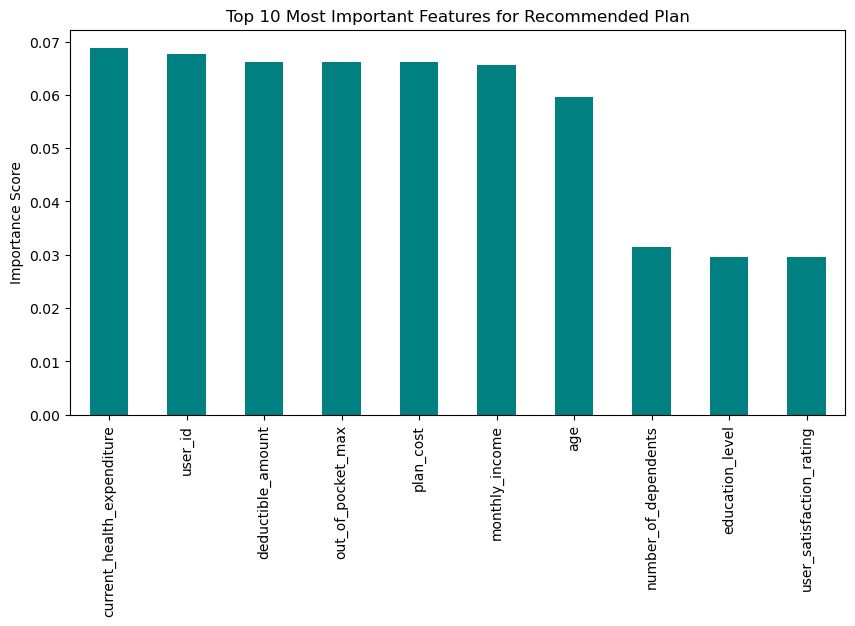

In [97]:

#Let us see the results with a Random Forest
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define Features (X) and Target (y)
X = df2.drop(columns=['recommended_plan'])  # Drop target variable
y = df2['recommended_plan']  # Target variable

# Step 2: Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Step 3: Get Feature Importances
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Step 4: Display Top 10 Features
print("Top 10 Most Important Features:\n", feature_importance.head(10))

# Step 5: Plot Feature Importance
plt.figure(figsize=(10, 5))
feature_importance.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Most Important Features for Recommended Plan")
plt.ylabel("Importance Score")
plt.show()


### **Feature Importance Analysis**  

#### **Strong Predictors**  
- `current_health_expenditure`, `plan_cost`, and `deductible_amount` are **highly important**.  
- This makes sense, as **healthcare costs** play a crucial role in recommending an insurance plan.  

#### **Less Expected Features**  
- `user_id` appears as an important feature, but it should **be dropped** since it's just an identifier.  
- `education_level` is also significant, suggesting that **higher education might influence insurance choices**.  


# MODELLING

We'll implement three different recommender system models:

✅ 1️⃣ Content-Based Filtering – Uses feature similarity to recommend insurance plans.

✅ 2️⃣ Collaborative Filtering – Uses past user interactions to predict preferences.

✅ 3️⃣ Hybrid Model – Combines both approaches for improved recommendations.

**1. Content Based Filtering Model**

In [99]:

from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize
# feature columns
feature_cols = ['age', 'monthly_income','plan_cost', 'current_health_expenditure','deductible_amount']
df_features = df2[feature_cols]
# Convert Features into a Sparse Matrix
df_sparse = csr_matrix(df_features.values)

#Normalize to Prevent Bias in Similarity
df_sparse = normalize(df_sparse, norm='l2', axis=1)

# Fit Nearest Neighbors model (alternative to cosine similarity matrix)
knn = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=6, n_jobs=-1)
knn.fit(df_sparse)




NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=6)

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import normalize
# from sklearn.neighbors import NearestNeighbors

# def recommend_insurance(user_id, df2, knn, feature_cols, n_recommendations=5):
#     """
#     Recommend insurance plans for a given user based on feature similarity.

#     Parameters:
#     - user_id: ID of the user to recommend plans for.
#     - df2: DataFrame containing user data.
#     - knn: Trained NearestNeighbors model.
#     - feature_cols: List of feature columns used in the model.
#     - n_recommendations: Number of recommendations to return.

#     Returns:
#     - DataFrame with recommended insurance plans.
#     """
#     if user_id not in df2['user_id'].values:
#         raise ValueError(f"User ID {user_id} not found in dataset.")

#     user_idx = df2.index[df2['user_id'] == user_id][0]

#     user_vector = df2.loc[user_idx, feature_cols].values.reshape(1, -1)
#     user_vector = normalize(user_vector, norm='l2')

#     distances, indices = knn.kneighbors(user_vector, n_neighbors=n_recommendations + 1)

#     recommended_indices = indices[0][1:]
#     recommended_distances = distances[0][1:]

#     recommendations = df2.iloc[recommended_indices][['user_id', 'plan_cost']].copy()
#     recommendations['similarity_score'] = 1 - recommended_distances

#     recommendations.rename(columns={'plan_cost': 'recommended_plan_cost'}, inplace=True)

#     return recommendations

# user_id = 1
# knn = NearestNeighbors(metric='cosine', algorithm='brute')
# knn.fit(normalize(df2[feature_cols], norm='l2', axis=1))
# recommendations = recommend_insurance(user_id, df2, knn, feature_cols)
# print(recommendations)


        user_id  recommended_plan_cost  similarity_score
845    0.016900               0.000360          0.999998
11130  0.222604               0.001523          0.999996
17937  0.358747               0.000982          0.999992
46402  0.928059               0.000801          0.999991
14677  0.293546               0.003007          0.999990
